# LDA (Linear Discriminant Analysis)

In [22]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine+Learning+A-Z+(Codes+and+Datasets) (6)\Machine Learning A-Z (Codes and Datasets)\Part 9 - Dimensionality Reduction\Section 43 - Principal Component Analysis (PCA)\Python

C:\Users\User\Desktop\Anindita Mitra\Machine+Learning+A-Z+(Codes+and+Datasets) (6)\Machine Learning A-Z (Codes and Datasets)\Part 9 - Dimensionality Reduction\Section 43 - Principal Component Analysis (PCA)\Python


In [11]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [17]:
#Training the model using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predicting Real Test Set
y_pred = classifier.predict(X_test)

In [20]:
# No of correct and incorrt prdection
from sklearn.metrics import confusion_matrix, accuracy_score

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


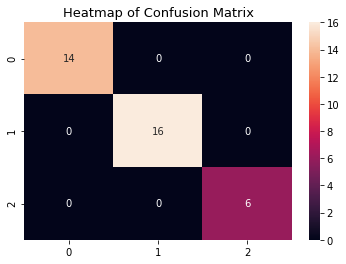

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()

In [24]:
accuracy_score(y_test, y_pred) 

1.0